In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , f1_score
from sklearn.tree import DecisionTreeClassifier , plot_tree




Decision Tree Classifier

In [2]:
class DecisionStump:
    def __init__(self):
        self.feature = None
        self.threshold = None
        self.value_left = None
        self.value_right = None

    def fit(self, X, y):
        best_gain = -1
        for feature_index in range (X.shape[1]):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_mask = X[:,feature_index] <= threshold
                right_mask = ~left_mask
                left_y, right_y = y[left_mask],y[right_mask]
                if len(left_y) and len(right_y):
                    left_weight = len(left_y) / len(y)
                    right_weghit= 1 - left_weight
                    gain = self._entropy(y) - (left_weight * self._entropy(left_y)+right_weghit*self._entropy(right_y))
                    if gain > best_gain:
                        best_gain = gain
                        self.feature = feature_index
                        self.threshold = threshold
                        self.value_left = np.bincount(left_y).argmax()
                        self.value_right = np.bincount(right_y).argmax()

    def predict(self,X):
        return np.where(X[:,self.feature] <= self.threshold, self.value_left,self.value_right)
    def _entropy(self,y):
        proportions = np.bincount(y) / len(y)
        return -np.sum([p * np.log2(p) for p in proportions if p > 0])
    



In [3]:
iris = load_iris()
X, y = iris.data, iris.target

print(f"Iris features: {iris. feature_names}")
print(f"Iris target: {iris.target_names}")

Iris features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Iris target: ['setosa' 'versicolor' 'virginica']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y.flatten(),test_size=0.2,random_state=42)
print(f"Shape of X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}, y_test: {y_test.shape}")


Shape of X_train: (120, 4), y_train: (120,)
Shape of X_test: (30, 4), y_test: (30,)


In [5]:
stump = DecisionStump()
stump.fit(X_train, y_train)

stump_predictions = stump.predict(X_test)

print(f"Decision Stump Accuracy: {accuracy_score(y_test, stump_predictions):.3f}")
print(f"Decision stump F1-score: {f1_score(y_test, stump_predictions, average='weighted')}")


Decision Stump Accuracy: 0.633
Decision stump F1-score: 0.5195402298850574


Sklearn DT Accuracy: 0.967
Sklearn DT f1-Score:0.966


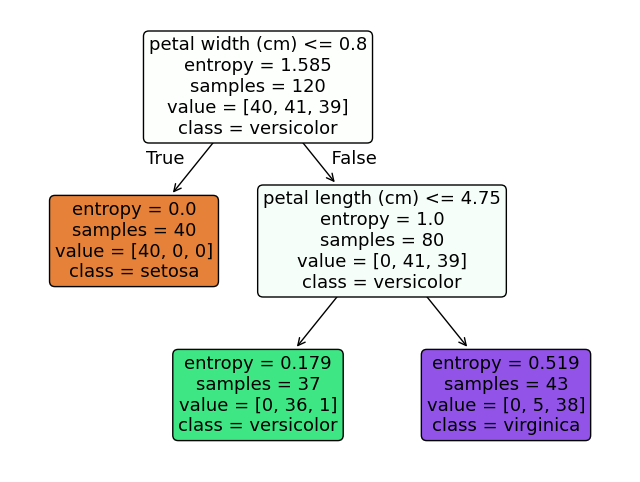

In [6]:
dt_sklearn = DecisionTreeClassifier(criterion='entropy', max_depth=2)
dt_sklearn.fit(X_train,y_train)

dt_skl_predictions = dt_sklearn.predict(X_test)
print(f"Sklearn DT Accuracy: {accuracy_score(y_test, dt_skl_predictions):.3f}")
print(f"Sklearn DT f1-Score:{f1_score(y_test, dt_skl_predictions, average="weighted"):.3f}")
plt.figure(figsize=(8,6))
plt.title("Decision Tree Visualization - sklearn")
plot_tree(dt_sklearn, feature_names=list(iris.feature_names), class_names = list(iris.target_names), filled = True , rounded= True )
plt.show()


Random Forest

In [7]:
from sklearn.utils import resample

class RandomForest:
    def __init__(self,n_trees=7):
        self.n_trees = n_trees
        self.trees = []

    def fit(self,X,y):
        self.trees = []
        for _ in range(self.n_trees):
            stump = DecisionStump()
            X_sample, y_sample = self._bootstrap_samples(X,y)
            stump.fit(X_sample, y_sample)
            self.trees.append(stump)

    def predict(self, X):
        stump_predictions = np.array([stump.predict(X) for stump in self.trees])
        return self._majority_vote(stump_predictions)
    
    def _majority_vote(self, predictions):

        return np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)
    
    def _bootstrap_samples(self,X,y):

        return resample(X, y,n_samples=len(X),replace=True)

In [8]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target
print(f"Breast Cancer features: {breast_cancer.feature_names}")
print(f"Breast Cancer target: {breast_cancer.target_names}")

Breast Cancer features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Breast Cancer target: ['malignant' 'benign']


In [9]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)
print(f"Shape of X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}, y_test: {y_test.shape}")

Shape of X_train: (455, 30), y_train: (455,)
Shape of X_test: (114, 30), y_test: (114,)


In [10]:
rf_custom = RandomForest()
rf_custom.fit(X_train, y_train)

rf_cust_predictions = rf_custom.predict(X_test)

print(f'Custom RF Accuracy: {accuracy_score(y_test,rf_cust_predictions):.3f}')
print(f"Custom RF F1-Score: {f1_score(y_test,rf_cust_predictions, average="weighted"):.3f}")

Custom RF Accuracy: 0.947
Custom RF F1-Score: 0.946


In [11]:
from sklearn.ensemble import RandomForestClassifier

rf_sklearn = RandomForestClassifier(n_estimators=7, max_depth=1, criterion="entropy",random_state=42)
rf_sklearn.fit(X_train, y_train.ravel())
rf_skl_predictions = rf_sklearn.predict(X_test)

print(f"Sklearn RF Accuracy: {accuracy_score(y_test,rf_skl_predictions):.3f}")
print(f"SKlearn RF F1-Score: {f1_score(y_test, rf_skl_predictions, average='weighted'):.3f}")


Sklearn RF Accuracy: 0.939
SKlearn RF F1-Score: 0.938


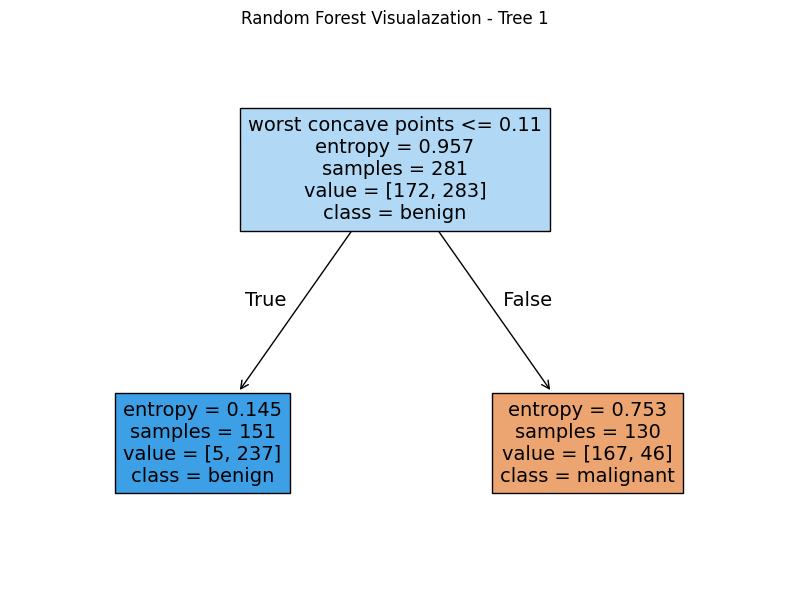

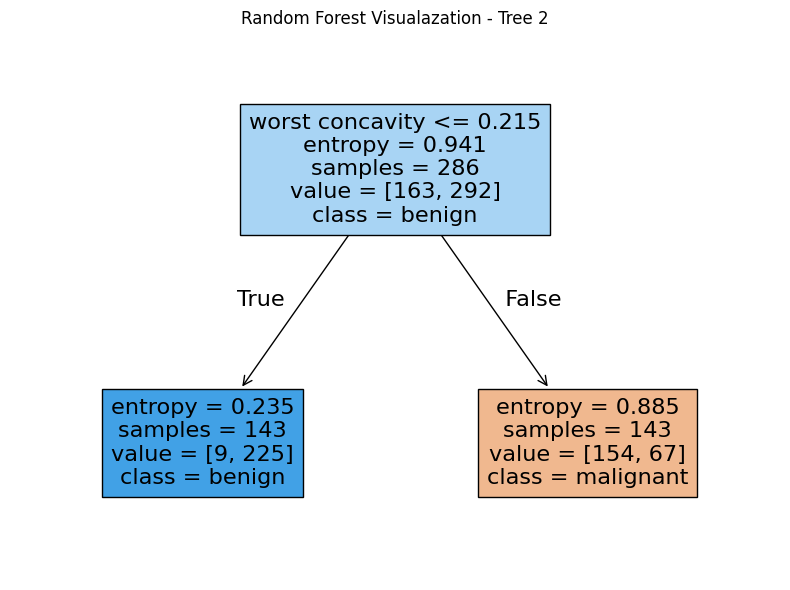

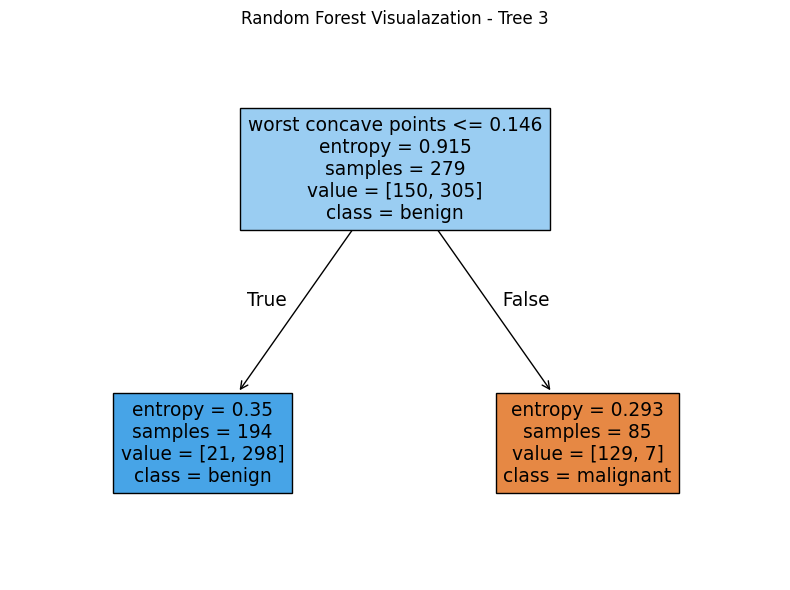

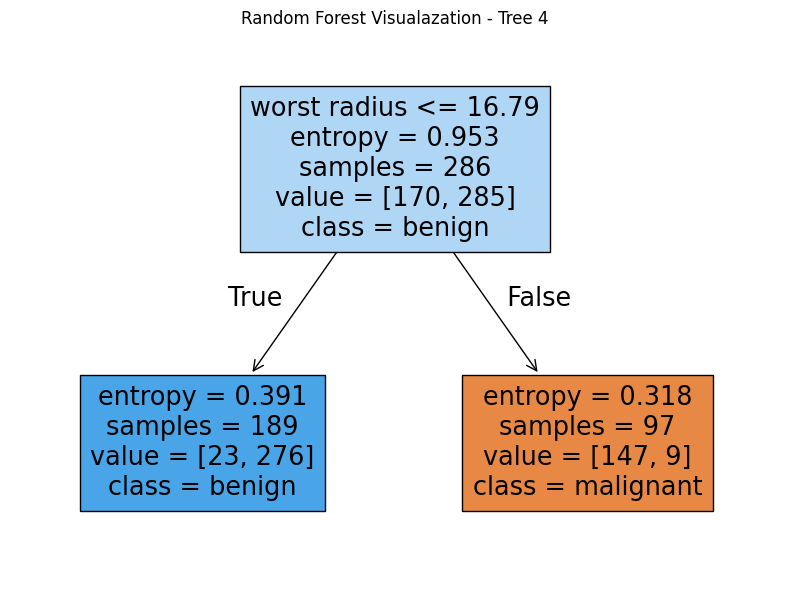

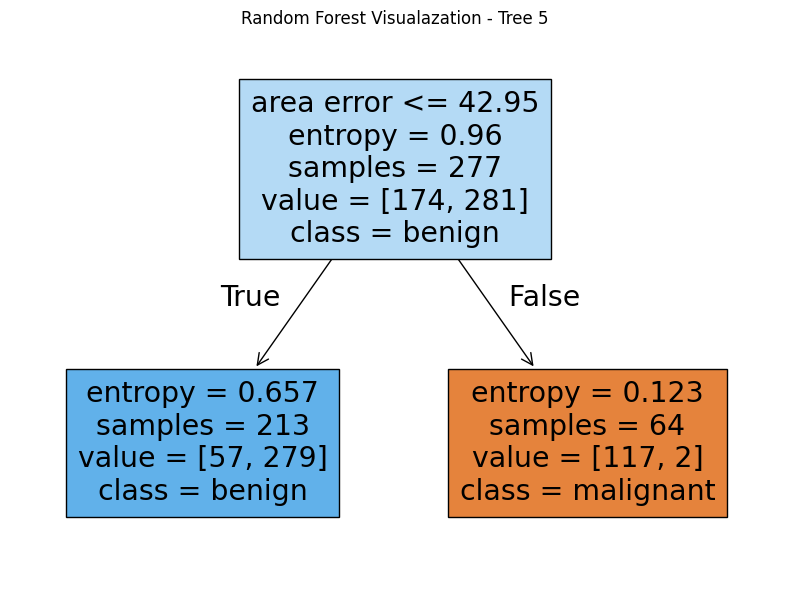

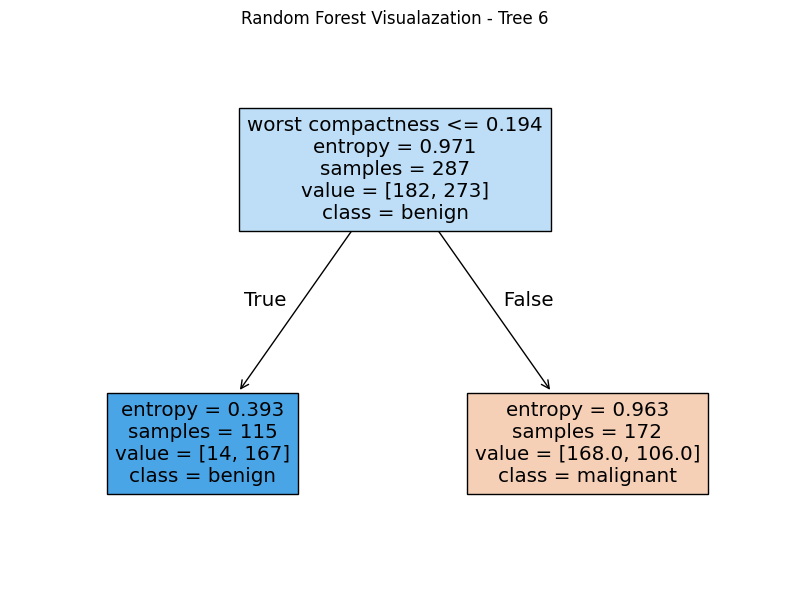

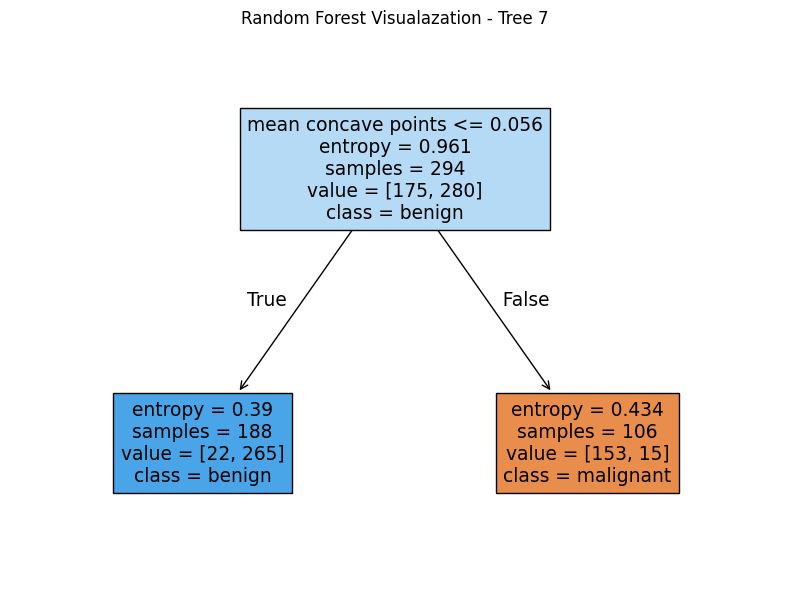

In [12]:
for idx, tree in enumerate(rf_sklearn.estimators_):
    plt.figure(figsize=(8,6))
    plot_tree(tree, filled = True, feature_names = list(breast_cancer.feature_names), class_names = list(breast_cancer.target_names))
    plt.title(f"Random Forest Visualazation - Tree {idx +1}")
    plt.tight_layout()
    plt.show()

    

In [13]:
sample_idx = 112
pd.set_option("display.max_columns",None)
pd.DataFrame(X_test[112].reshape(1,-1), columns=breast_cancer.feature_names).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,14.22,27.85,92.55,623.9,0.08223,0.1039,0.1103,0.04408,0.1342,0.06129,0.3354,2.324,2.105,29.96,0.006307,0.02845,0.0385,0.01011,0.01185,0.003589,15.75,40.54,102.5,764.0,0.1081,0.2426,0.3064,0.08219,0.189,0.07796


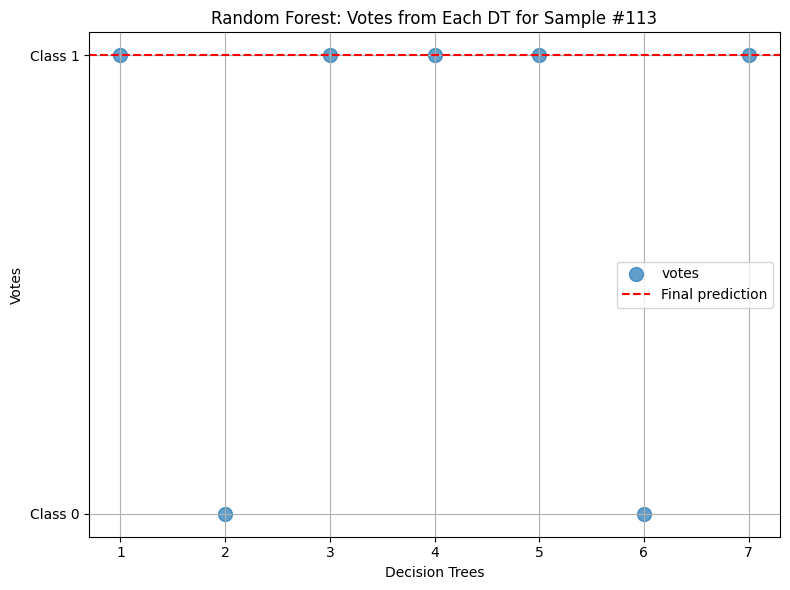

In [14]:
votes = [tree.predict(X_test[112].reshape(1,-1)) for tree in rf_sklearn.estimators_]
final_prediction = rf_sklearn.predict(X_test[sample_idx].reshape(1,-1))[0]

plt.figure(figsize=(8,6))
plt.scatter([range(1,len(rf_sklearn.estimators_)+1)], votes, s = 100, alpha= 0.7, label = "votes" )
plt.axhline(y = final_prediction, color = "r", linestyle = "--", label = "Final prediction")
plt.yticks([0,1], ['Class 0', "Class 1"])
plt.xlabel("Decision Trees")
plt.ylabel('Votes')
plt.title(f"Random Forest: Votes from Each DT for Sample #{sample_idx + 1}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

XGBoost

In [15]:
from xgboost import XGBClassifier, to_graphviz
xgb_model = XGBClassifier(eval_metric = "logloss", random_state = 42)
xgb_model.fit(X_train, y_train.ravel())

xgb_predictions = xgb_model.predict(X_test)

print(f"XGB Accuracy: {accuracy_score(y_test, xgb_predictions):.3f}")
print(f"XGB F1-Score: {f1_score(y_test, xgb_predictions, average="weighted"):.3f}")



XGB Accuracy: 0.956
XGB F1-Score: 0.956


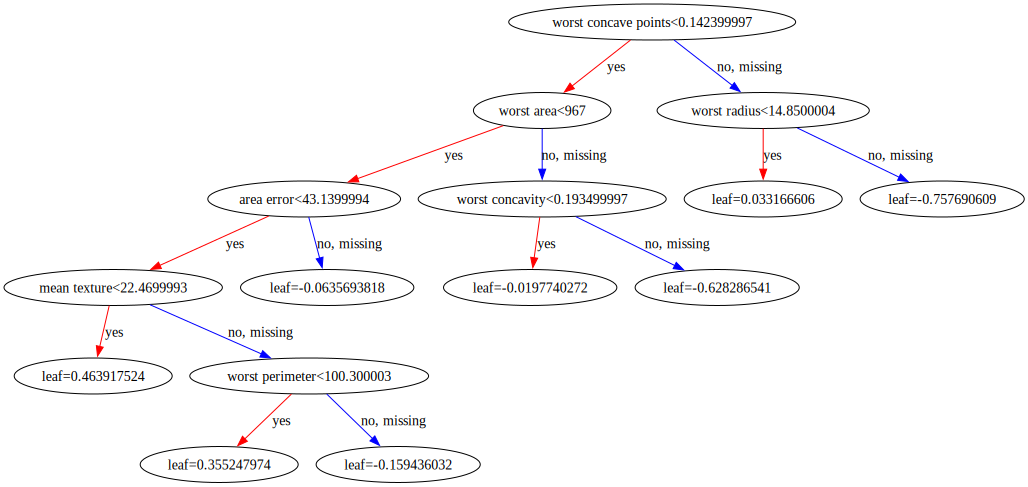

In [16]:
xgb_model.get_booster().feature_names = list(breast_cancer.feature_names)
graph = to_graphviz(xgb_model)
graph

c:\Users\ali_a\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:06:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Random Forest Accuracy: 0.9561
XGBoost Accuracy: 0.9561


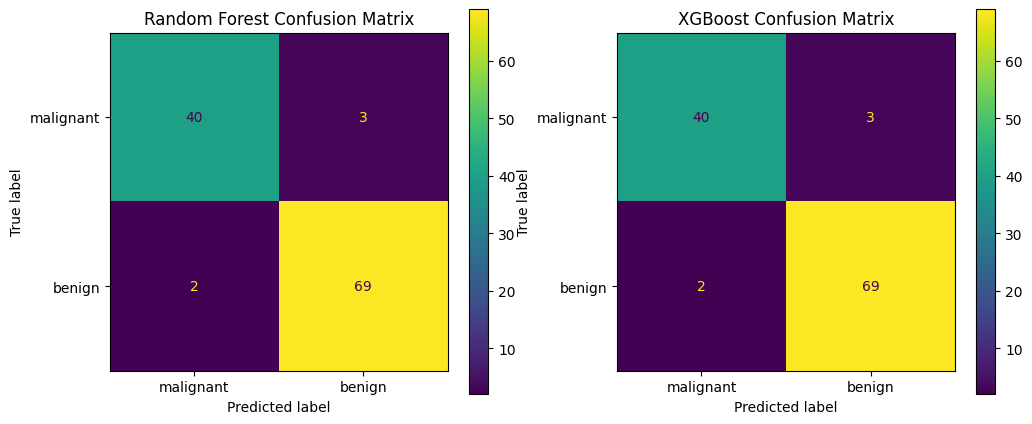


Random Forest Classification Report:
               precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        43
      benign       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

------------------------------------------------------------

XGBoost Classification Report:
               precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        43
      benign       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [17]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

def test_dataset(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_predictions = rf_model.predict(X_test)

    xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    xgb_model.fit(X_train, y_train)
    xgb_predictions = xgb_model.predict(X_test)

    rf_accuracy = accuracy_score(y_test, rf_predictions)
    xgb_accuracy = accuracy_score(y_test, xgb_predictions)

    print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
    print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")

    _, ax = plt.subplots(1, 2, figsize=(12, 5))

    cm_rf = confusion_matrix(y_test, rf_predictions)
    ConfusionMatrixDisplay(cm_rf, display_labels=list(breast_cancer.target_names)).plot(ax=ax[0])
    ax[0].set_title('Random Forest Confusion Matrix')

    cm_xgb = confusion_matrix(y_test, xgb_predictions)
    ConfusionMatrixDisplay(cm_xgb, display_labels=list(breast_cancer.target_names)).plot(ax=ax[1])
    ax[1].set_title('XGBoost Confusion Matrix')

    plt.show()

    print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_predictions, target_names=list(breast_cancer.target_names)))
    print("-" * 60)
    print("\nXGBoost Classification Report:\n", classification_report(y_test, xgb_predictions, target_names=list(breast_cancer.target_names)))

test_dataset(X, y)